In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

# Image I/O and channel structure
Load the input image and show its dimensions, keeping in mind that images are represented as a multi-dimensional NumPy array with shape $h\times w\times c$.
- $h$: height, the number of rows
- $w$: width, the number of columns
- $c$: channels, the number of channels/depth 

OpenCV stores images in BGR order rather than RGB so we swap the ordering of the channels, because `plt.imshow(image)` expects `image` to be in RGB order.
Try to see what happens if you display `bgr_img` instead of `image`.

In [2]:
path = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/4. semester/Perception for autonome systemer/Projekt/Projekt 1/"

bgr_img = cv2.imread(path + "jp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=322, depth=3


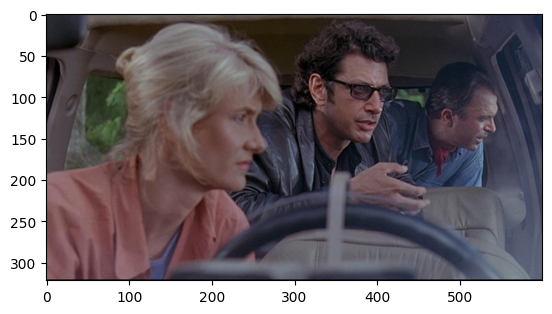

In [3]:
plt.imshow(image)

# Data/Image indexing
Access the RGB pixel located at $x=50$, $y=100$

In [4]:
(R, G, B) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


An image consists of multiple channels (3 in our case: red, green and blue).
We can split these up and then display each image:

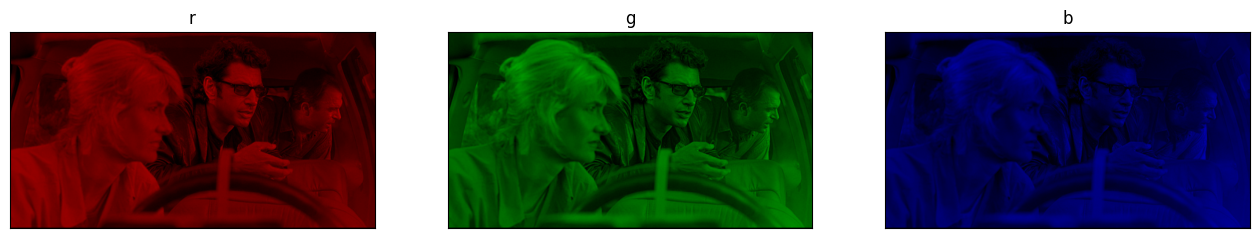

In [5]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Let's extract a $100\times 100$ pixel square ROI (Region of Interest) from the
input image starting at $x=320$,$y=60$ at ending at $x=420$,$y=160$

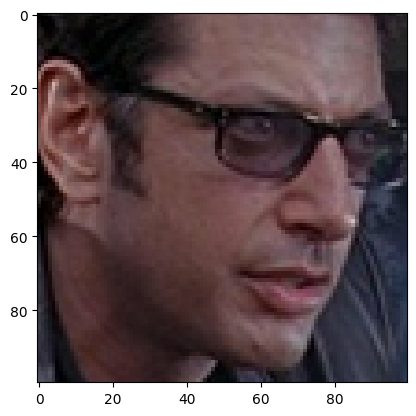

In [6]:
roi = image[60:160, 320:420]
plt.imshow(roi)

# Resizing operations
Let's resize the image to $200\times200$ px, ignoring the aspect ratio

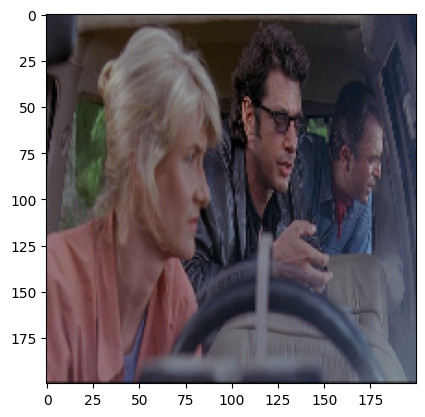

In [7]:
resized = cv2.resize(image, (200, 200))
plt.imshow(resized)

Resizing to a fixed size will distort aspect ratio. So let's resize the width to be $w=300$ px, but we'll compute the new height based on the aspect ratio of the original image.

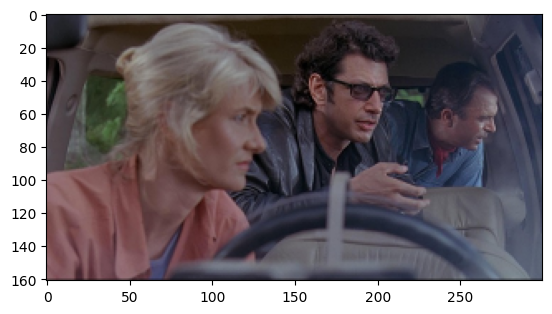

In [8]:
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
plt.imshow(resized)

Manually computing the aspect ratio is tedious, so let's use the `imutils` library instead:

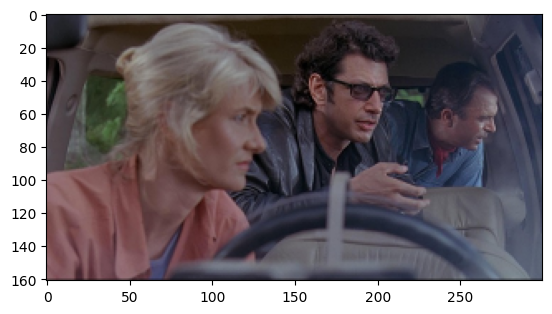

In [9]:
resized = imutils.resize(image, width=300)
plt.imshow(resized)

# Rotating operations
Let's rotate an image 45 degrees clockwise using OpenCV by first computing the image center, then constructing the rotation matrix, and then finally applying the affine warp:

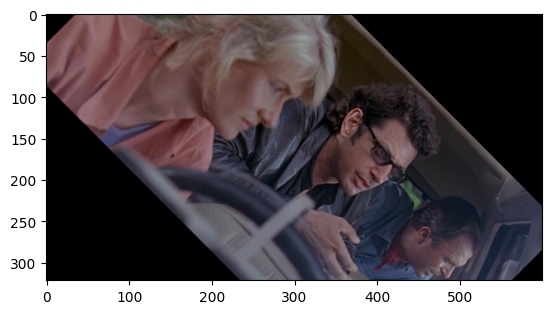

In [10]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

Rotation can also be easily accomplished via `imutils` with less code:

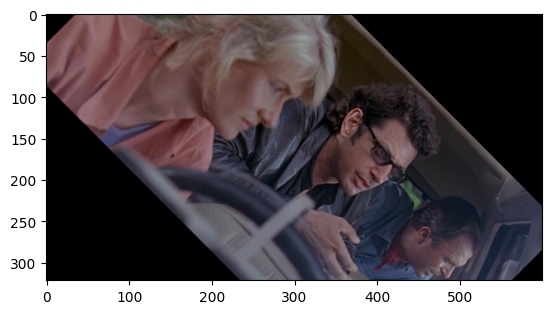

In [11]:
rotated = imutils.rotate(image, -45)
plt.imshow(rotated)

OpenCV doesn't "care" if our rotated image is clipped after rotation so we can instead use another imutils convenience function to help us out:

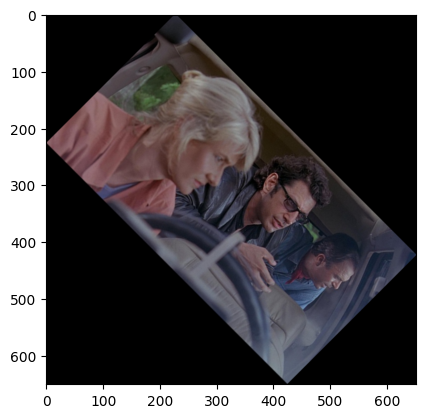

In [12]:
rotated = imutils.rotate_bound(image, 45)
plt.imshow(rotated)

# Image blurring
Apply a Gaussian blur with a $11\times 11$ kernel to the image to smooth it. This is useful when you want to reduce high frequency noise.

Try playing around with the kernel size. What does that do?

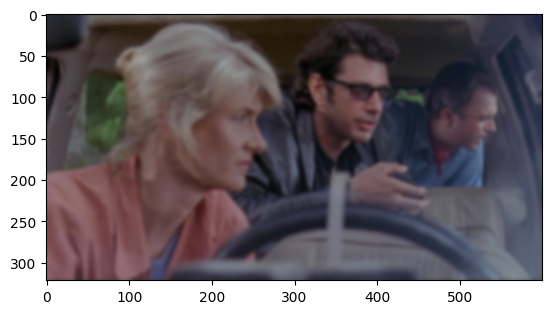

In [13]:
kernel = (11,11)

blurred = cv2.GaussianBlur(image, kernel, 0)
plt.imshow(blurred)

# Drawing operations
Draw a 2 px thick red rectangle surrounding the face

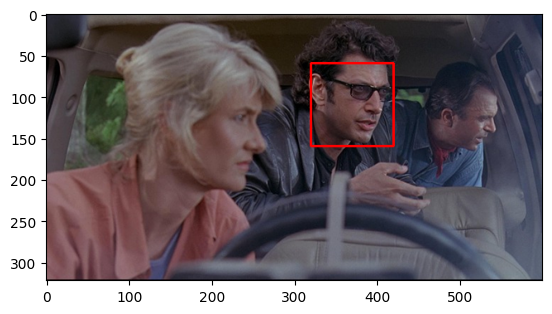

In [14]:
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (255, 0, 0), 2)
plt.imshow(output)

Draw a blue 20 px (filled in) circle on the image centered at $x=300$,$y=150$

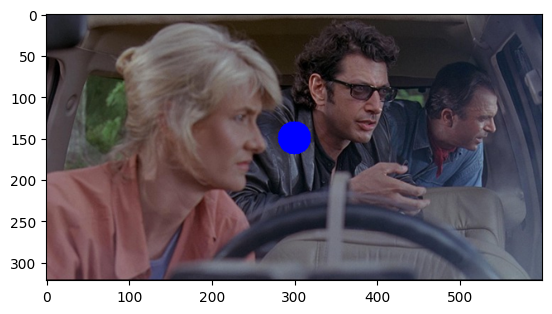

In [15]:
output = image.copy()
cv2.circle(output, (300, 150), 20, (0, 0, 255), -1)
plt.imshow(output)

Draw a 5 px thick red line from $x=60$,$y=20$ to $x=400$,$y=200$

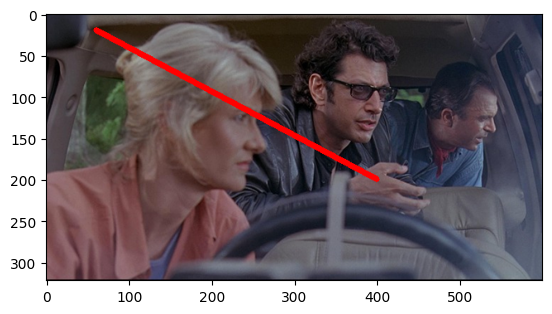

In [16]:
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (255, 0, 0), 5)
plt.imshow(output)

Draw green text on the image

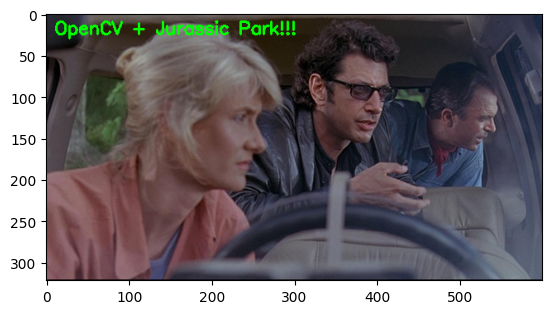

In [17]:
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(output)

# Exercise 1 
Find a picture some picture and try to do the same on that image and play around with the parameters. 
Don't spend too much time here but remember some of the functions introduced here, continue with Exercice 2.